In [15]:
from ScanImageTiffReader import ScanImageTiffReader
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import imageio
import os
import cv2
import caiman as cm

In [2]:
path = '/media/david/hdd/David_GCAMP/20210812'
filename = "file_00011.tif"

In [3]:
os.chdir(path)
vol=ScanImageTiffReader(filename).data()
metadata =ScanImageTiffReader(filename).metadata()
vol.shape

(3000, 512, 512)

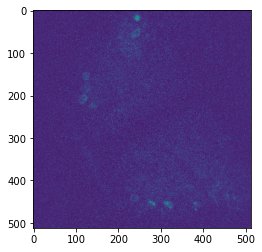

In [7]:
plt.imshow(vol[10,:,:])

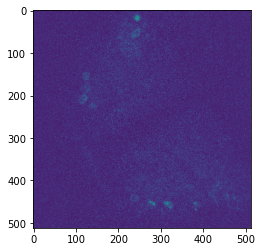

In [20]:
test = cv2.normalize(vol[10,:,:], None, 0, 255, cv2.NORM_MINMAX)
plt.imshow(np.uint8(test))


In [4]:
metadata

'SI.ConfigPageClass = \'dabs.resources.configuration.resourcePages.SIPage\'\nSI.LINE_FORMAT_VERSION = 1\nSI.PREMIUM = false\nSI.TIFF_FORMAT_VERSION = 4\nSI.VERSION_COMMIT = \'629d62e2df131e6c6d4c53a5c38dede99c60f405\'\nSI.VERSION_MAJOR = 2020\nSI.VERSION_MINOR = 1\nSI.VERSION_UPDATE = 1\nSI.acqState = \'grab\'\nSI.acqsPerLoop = 1\nSI.errorMsg = \'\'\nSI.extTrigEnable = false\nSI.fieldCurvatureRxs = []\nSI.fieldCurvatureRys = []\nSI.fieldCurvatureZs = []\nSI.hBeams.enablePowerBox = false\nSI.hBeams.errorMsg = \'\'\nSI.hBeams.flybackBlanking = true\nSI.hBeams.hBeamRouters = {}\nSI.hBeams.hBeams = {\'Pockel Cell\'}\nSI.hBeams.hReserver = []\nSI.hBeams.hUsers = {}\nSI.hBeams.interlaceDecimation = 1\nSI.hBeams.interlaceOffset = 0\nSI.hBeams.lengthConstants = Inf\nSI.hBeams.name = \'SI Beams\'\nSI.hBeams.powerBoxEndFrame = Inf\nSI.hBeams.powerBoxStartFrame = 1\nSI.hBeams.powerBoxes.rect = [0.25 0.25 0.5 0.5]\nSI.hBeams.powerBoxes.powers = NaN\nSI.hBeams.powerBoxes.name = \'\'\nSI.hBeams.powe

In [4]:
str_volume = metadata.find('actualNumVolumes')
temp_str = metadata[str_volume:str_volume+25]
end = temp_str.find('\n')
start = len('actualNumVolumes')+3
total_volume = int(temp_str[start:end])

In [5]:
str_framesPerSlice = metadata.find('framesPerSlice')
temp_str = metadata[str_framesPerSlice:str_framesPerSlice+30]
end = temp_str.find('\n')
start = len('framesPerSlice')+3
framesPerSlice = int(temp_str[start:end])

In [6]:
str_slice = metadata.find('actualNumSlices')
temp_str = metadata[str_slice:str_slice+30]
end = temp_str.find('\n')
start = len('actualNumSlices')+3
num_slice = int(temp_str[start:end])

In [7]:
str_FrameRate = metadata.find('scanFrameRate')
temp_str = metadata[str_FrameRate:str_FrameRate+35]
end = temp_str.find('\n')
start = len('scanFrameRate')+3
FrameRate = float(temp_str[start:end])

In [8]:
str_FramesPerVolume = metadata.find('numFramesPerVolume')
temp_str = metadata[str_FramesPerVolume:str_FramesPerVolume+35]
end = temp_str.find('\n')
start = len('numFramesPerVolume')+3
numFramesPerVolume = int(temp_str[start:end])

In [9]:
print('The acutual number of frames per slice is ' + str(framesPerSlice))
print('The acutual number of slice is ' + str(num_slice))
print('The acutual number of volumes is ' + str(total_volume))
print('The total frames is ' + str(total_volume*framesPerSlice*num_slice))

The acutual number of frames per slice is 15
The acutual number of slice is 2
The acutual number of volumes is 100
The total frames is 3000


In [10]:
print('The number of frames per volume is ' + str(numFramesPerVolume))

The number of frames per volume is 30


In [11]:
real_data = np.zeros((framesPerSlice*total_volume,vol.shape[1],vol.shape[2],num_slice))
for slice in range(num_slice):
    for volume in range(total_volume):
        real_data[framesPerSlice*volume:framesPerSlice*volume+framesPerSlice,:,:,slice] = vol[numFramesPerVolume*volume+(slice*framesPerSlice):numFramesPerVolume*volume+(slice+1)*framesPerSlice,:,:]

In [12]:
for i in range(num_slice):
    sliced_data = real_data[:,:,:,0].reshape((framesPerSlice*total_volume,vol.shape[1],vol.shape[2]))
    sliced_movie = cm.movie(sliced_data)
    test_movie.save(filename[0:-4]+'_'+str(i+1)+'.tif')
    #imageio.mimwrite(filename[0:-4]+'_'+str(i+1)+'.tif', sliced_data)
    #np.save(filename[0:-4]+'_'+str(i+1),sliced_data)

NameError: name 'test_movie' is not defined